In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import random
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from keras.optimizers import Adam, RMSprop, SGD
from keras import regularizers
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
import datetime
from keras.utils import plot_model
import seaborn as sns

In [2]:
# Đường dẫn tới thư mục chứa dữ liệu cho tập train và tập validation
train_dir = 'data/train'
val_dir = 'data/val_new'
test_dir = 'data/test_new'


row = 48
col = 48
classes = len(os.listdir('data/train'))

In [4]:
def count_images(directory):
    # Đếm số lượng ảnh trong thư mục chỉ định
    image_count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(('jpeg', 'jpg', 'png', 'bmp', 'gif')):
                image_count += 1
    return image_count


In [5]:
# Đếm số lượng ảnh trong tập train và test
train_image_count = count_images(train_dir)
val_image_count = count_images(val_dir)
test_image_count = count_images(test_dir)

print(f'Số lượng ảnh trong tập train: {train_image_count}')
print(f'Số lượng ảnh trong tập train: {val_image_count}')
print(f'Số lượng ảnh trong tập test: {test_image_count}')

Số lượng ảnh trong tập train: 28709
Số lượng ảnh trong tập train: 3591
Số lượng ảnh trong tập test: 3587


In [15]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True,
                                   rotation_range=10,
                                   width_shift_range= 0.1,
                                   height_shift_range= 0.1,
                                   shear_range= 0.2 )



training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_set = val_datagen.flow_from_directory(val_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=False,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 3591 images belonging to 7 classes.
Found 3587 images belonging to 7 classes.


In [6]:
# Function to count images in each class
def count_images_in_directory(directory):
    class_counts = {}
    # Iterate over class directories and count images
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            # Count the number of files in each class directory
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10100\3535261324.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10100\3535261324.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10100\3535261324.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


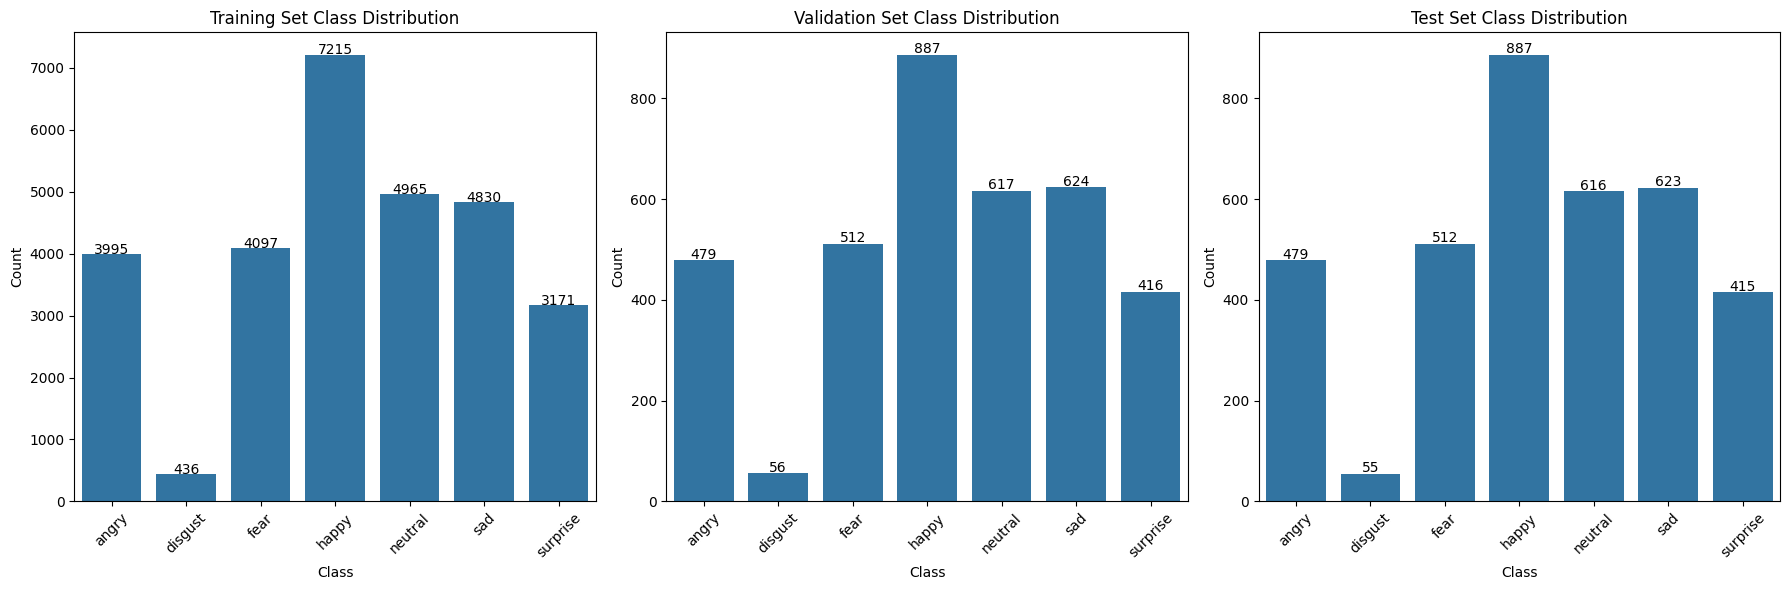

In [9]:
# Get class counts for training, validation, and test datasets
train_class_counts = count_images_in_directory(train_dir)

# Get test set class counts
val_class_counts = count_images_in_directory(val_dir)

# Get validation set class counts
test_class_counts = count_images_in_directory(test_dir)

def plot_with_counts(ax, data, title):
    sns.barplot(x=list(data.keys()), y=list(data.values()), ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Class')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '%d' % int(height), ha='center', size=10)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot train set class distribution
plot_with_counts(axes[0], train_class_counts, 'Training Set Class Distribution')

# Plot validation set class distribution
plot_with_counts(axes[1], val_class_counts, 'Validation Set Class Distribution')

# Plot test set class distribution
plot_with_counts(axes[2], test_class_counts, 'Test Set Class Distribution')

plt.tight_layout()
plt.show()

In [10]:
from keras.models import load_model
fernet = load_model('model/model_17_5_file.h5')

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [13]:
fernet.compile(optimizer=Adam(learning_rate=0.0001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 716ms/step


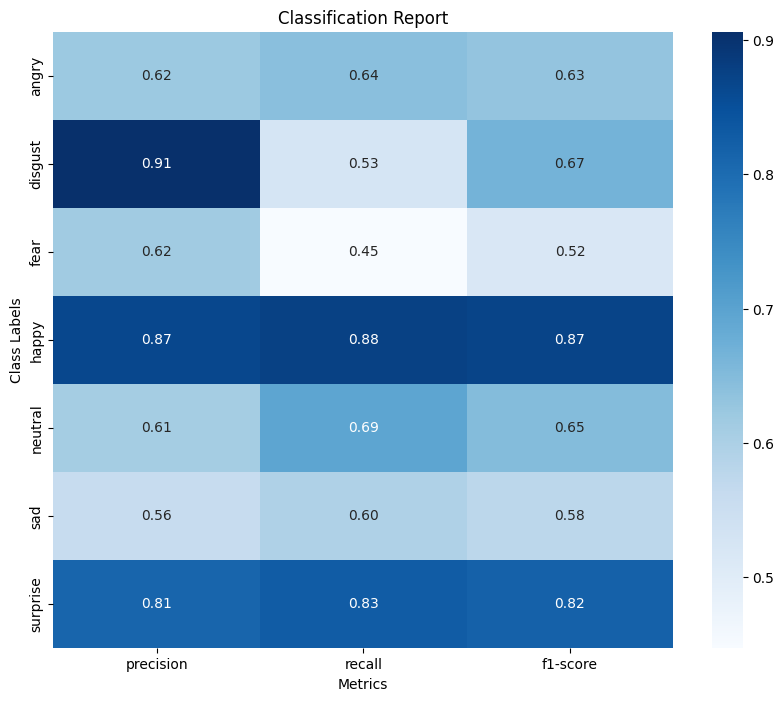

In [16]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

# Dự đoán trên tập test
test_predictions = fernet.predict(test_set)
test_predictions_classes = np.argmax(test_predictions, axis=1)
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())

# Tạo báo cáo phân loại
report = classification_report(true_classes, test_predictions_classes, target_names=class_labels, output_dict=True)

# Chuyển báo cáo phân loại thành DataFrame
report_df = pd.DataFrame(report).transpose()

# Lấy các chỉ số precision, recall, f1-score cho từng lớp
metrics_df = report_df.loc[class_labels, ['precision', 'recall', 'f1-score']]

# Vẽ bảng kết quả
plt.figure(figsize=(10, 8))
sns.heatmap(metrics_df, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Metrics')
plt.ylabel('Class Labels')
plt.title('Classification Report')
plt.show()
